In [1]:
import numpy as np
from skimage import measure
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [3]:
def fundamentalist(b, beta, p):
    R, y = 1.01, 0.0
    num1 = np.exp(beta*(p - R*p)*( - R*p))
    num2 = np.exp(beta*(p - R*p)*(p+b*y - R*p))
    num3 = np.exp(beta*(p - R*p)*(p- R*p))
    den = num1 + num2 + num3 
    return den*R*p - num2*(p + b*y)

In [107]:
def two_types(g, b, p, beta = 0.0):
    R, y = 1.01, 1.0
    num1 = np.exp(beta*(p - R*p)*(g*p - R*p))
    num2 = np.exp(beta*(p - R*p)*(b*y - R*p))
    den = num1 + num2
    return den*R*p - num1*g*p - num2*b*y

In [4]:
def speculator(b, g, p, beta = .90):
    R, y = 1.01, 1.0
    num1 = np.exp(beta*(p - R*p)*(g*p - R*p))
    num2 = np.exp(beta*(p - R*p)*(b*y - R*p))
    num3 = np.exp(beta*(p - R*p)*(p- R*p))
    den = num1 + num2 + num3 
    return den*R*p - num1*g*p - num2*b*y - num3 * p

In [69]:
def speculator_and_fundamentalist(b, beta, p):
    R, y = 1.01, 1.0
    num1 = np.exp(beta*(p - R*p)*( -R*p))
    num2 = np.exp(beta*(p - R*p)*(p+b*y - R*p))
    #num3 = np.exp(beta*(p - R*p)*(p- R*p))
    den = num1 + num2 
    return den*R*p - num2*(b*y+p)

In [147]:
x1 = np.linspace(0.0, 2.0, 50)
x2 = np.linspace(0, 5.0, 50)
x3 = np.linspace(0,25,50)
g, b, p = np.meshgrid(x1, x2, x3)
F = two_types(b, g, p, beta = 0.0)

In [148]:
verts, faces, normals, values = measure.marching_cubes(F, 0, spacing=[np.diff(x1)[0],np.diff(x2)[0], np.diff(x3)[0]])

Text(0.5, 0, '$\\bar{p}$')

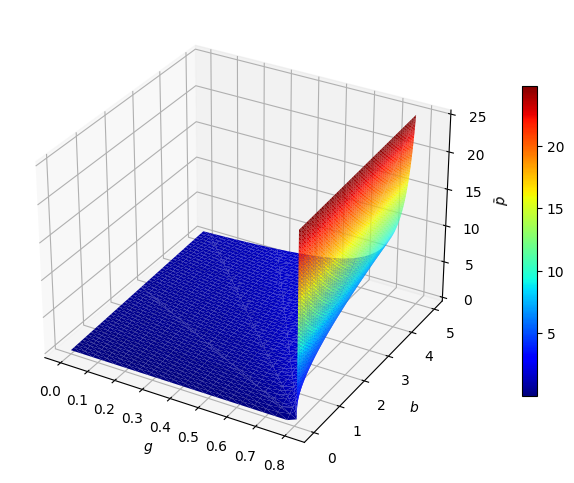

In [149]:
fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(1,1,1, projection='3d')
p = ax.plot_trisurf(verts[:, 0], verts[:, 1], faces, verts[:, 2], cmap='jet', lw=0)
fig.colorbar(p, ax=ax, fraction=0.025, pad=0.08)
ax.set_xlabel(r'$g$')
ax.set_ylabel(r'$b$')
ax.set_zlabel(r'$\bar{p}$')

#plt.savefig('results\implicit3d_beta_3.0.png')

In [257]:
from sympy import symbols, solve

def get_num_solutions_with_params(equation, param_values):
    x = symbols('x')
    for var, val in param_values.items():
        equation = equation.subs(var, val)
    solutions = solve(equation, x)
    return len(solutions)

In [259]:
equation = "x**2 - a"
param_values = {"a": 4}
num_solutions = get_num_solutions_with_params(equation, param_values)
print(num_solutions)

AttributeError: 'str' object has no attribute 'subs'